In [1]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Movie Rating Analysis").getOrCreate()

In [6]:
df = spark.read.csv("/content/imdb_top_1000.csv", header=True, inferSchema=True)

# Show first few rows of the data
df.show(5)

+--------------------+--------------------+-------------+-----------+-------+--------------------+-----------+--------------------+----------+--------------------+--------------+--------------+-------------+--------------+-----------+-----------+
|         Poster_Link|        Series_Title|Released_Year|Certificate|Runtime|               Genre|IMDB_Rating|            Overview|Meta_score|            Director|         Star1|         Star2|        Star3|         Star4|No_of_Votes|      Gross|
+--------------------+--------------------+-------------+-----------+-------+--------------------+-----------+--------------------+----------+--------------------+--------------+--------------+-------------+--------------+-----------+-----------+
|https://m.media-a...|The Shawshank Red...|         1994|          A|142 min|               Drama|        9.3|Two imprisoned me...|        80|      Frank Darabont|   Tim Robbins|Morgan Freeman|   Bob Gunton|William Sadler|    2343110| 28,341,469|
|https://m.m

In [8]:
# Select relevant columns
df_cleaned = df.select("Series_Title", "Released_Year", "Genre", "IMDB_Rating", "Meta_score", "Director", "No_of_votes")

# Show the cleaned data
df_cleaned.show(5)

# Handle missing values (if any)
df_cleaned = df_cleaned.dropna()  # Drop rows with any missing values


+--------------------+-------------+--------------------+-----------+----------+--------------------+-----------+
|        Series_Title|Released_Year|               Genre|IMDB_Rating|Meta_score|            Director|No_of_votes|
+--------------------+-------------+--------------------+-----------+----------+--------------------+-----------+
|The Shawshank Red...|         1994|               Drama|        9.3|        80|      Frank Darabont|    2343110|
|       The Godfather|         1972|        Crime, Drama|        9.2|       100|Francis Ford Coppola|    1620367|
|     The Dark Knight|         2008|Action, Crime, Drama|        9.0|        84|   Christopher Nolan|    2303232|
|The Godfather: Pa...|         1974|        Crime, Drama|        9.0|        90|Francis Ford Coppola|    1129952|
|        12 Angry Men|         1957|        Crime, Drama|        9.0|        96|        Sidney Lumet|     689845|
+--------------------+-------------+--------------------+-----------+----------+--------

In [10]:
df_cleaned.show()

+--------------------+-------------+--------------------+-----------+----------+--------------------+-----------+
|        Series_Title|Released_Year|               Genre|IMDB_Rating|Meta_score|            Director|No_of_votes|
+--------------------+-------------+--------------------+-----------+----------+--------------------+-----------+
|The Shawshank Red...|         1994|               Drama|        9.3|        80|      Frank Darabont|    2343110|
|       The Godfather|         1972|        Crime, Drama|        9.2|       100|Francis Ford Coppola|    1620367|
|     The Dark Knight|         2008|Action, Crime, Drama|        9.0|        84|   Christopher Nolan|    2303232|
|The Godfather: Pa...|         1974|        Crime, Drama|        9.0|        90|Francis Ford Coppola|    1129952|
|        12 Angry Men|         1957|        Crime, Drama|        9.0|        96|        Sidney Lumet|     689845|
|The Lord of the R...|         2003|Action, Adventure...|        8.9|        94|       P

In [12]:
from pyspark.sql.functions import avg
#Average IMDb Rating by Genre:

# Group by Genre and calculate the average IMDb rating
df_genre_rating = df_cleaned.groupBy("Genre").agg(avg("IMDB_Rating").alias("avg_imdb_rating"))

# Show the results
df_genre_rating.show()


+--------------------+------------------+
|               Genre|   avg_imdb_rating|
+--------------------+------------------+
|    Action, Thriller| 7.866666666666667|
|Animation, Comedy...|               7.7|
|     Crime, Thriller| 7.966666666666666|
|Action, Adventure...| 8.199999999999998|
|   Adventure, Sci-Fi|              8.15|
|Drama, Fantasy, H...|               8.2|
|Animation, Advent...|               8.1|
|Animation, Biogra...|               7.8|
|Animation, Advent...| 7.957142857142857|
|Action, Adventure...|               7.9|
|Comedy, Crime, My...|               8.0|
|Adventure, Biogra...|               7.8|
|       Comedy, Drama| 7.841379310344825|
|Biography, Drama,...| 7.771428571428572|
|Comedy, Drama, Ro...| 7.847826086956521|
|Drama, Romance, T...|              7.85|
|       Action, Drama|              7.65|
|Drama, Mystery, S...|             8.125|
|Comedy, Family, R...|               7.8|
|Adventure, Drama,...|7.8999999999999995|
+--------------------+------------

In [13]:
#Average IMDb Rating by Year
df_year_rating = df_cleaned.groupBy("Released_Year").agg(avg("IMDB_Rating").alias("avg_imdb_rating"))

# Show the results
df_year_rating.show()


+-------------+------------------+
|Released_Year|   avg_imdb_rating|
+-------------+------------------+
|         1953| 7.925000000000001|
|         1957| 8.316666666666666|
|         1987| 7.841666666666665|
|         1956| 7.800000000000001|
|         1936|               8.5|
|         2016| 7.914285714285716|
|         2020|             8.075|
|         2012| 7.935294117647059|
|         1958|               8.1|
|         1943|               7.8|
|         1972| 8.139999999999999|
|         1931|              8.15|
|         1988|            8.0625|
|         1938| 7.833333333333333|
|         2019|7.9714285714285715|
|         2017|7.8210526315789455|
|         1932|              7.85|
|         1977| 8.066666666666668|
|         2014|7.9066666666666645|
|         1971| 7.875000000000001|
+-------------+------------------+
only showing top 20 rows



In [14]:
df_top_rated = df_cleaned.orderBy("IMDB_Rating", ascending=False).limit(10)

# Show top 10 movies
df_top_rated.show()


+--------------------+-------------+--------------------+-----------+----------+--------------------+-----------+
|        Series_Title|Released_Year|               Genre|IMDB_Rating|Meta_score|            Director|No_of_votes|
+--------------------+-------------+--------------------+-----------+----------+--------------------+-----------+
|The Shawshank Red...|         1994|               Drama|        9.3|        80|      Frank Darabont|    2343110|
|       The Godfather|         1972|        Crime, Drama|        9.2|       100|Francis Ford Coppola|    1620367|
|     The Dark Knight|         2008|Action, Crime, Drama|        9.0|        84|   Christopher Nolan|    2303232|
|The Godfather: Pa...|         1974|        Crime, Drama|        9.0|        90|Francis Ford Coppola|    1129952|
|        12 Angry Men|         1957|        Crime, Drama|        9.0|        96|        Sidney Lumet|     689845|
|The Lord of the R...|         2003|Action, Adventure...|        8.9|        94|       P

In [15]:
from pyspark.sql.functions import col

# Convert 'No_of_votes' to integer (if necessary)
df_cleaned = df_cleaned.withColumn("No_of_votes", col("No_of_votes").cast("int"))

# Calculate correlation between votes and IMDb rating
correlation = df_cleaned.corr("IMDB_Rating", "No_of_votes")

print(f"Correlation between votes and IMDb Rating: {correlation}")


Correlation between votes and IMDb Rating: 0.582108404010122


In [17]:
df_director_rating = df_cleaned.groupBy("Director").agg(avg("IMDB_Rating").alias("avg_imdb_rating"))

# Show the results
df_director_rating.show(20)


+--------------------+------------------+
|            Director|   avg_imdb_rating|
+--------------------+------------------+
|        Jim Jarmusch| 7.733333333333333|
|      Chan-wook Park|             7.975|
|       Yôjirô Takita|               8.1|
|      Dorota Kobiela|               7.8|
|      Nicholas Meyer|               7.7|
|     Yoshifumi Kondô|               7.9|
|      Michael Curtiz|               8.2|
|      Theodore Melfi|               7.8|
|    Martin Zandvliet|               7.8|
|         Je-kyu Kang|               8.1|
|      Akira Kurosawa|              8.25|
|  Billy Bob Thornton|               8.0|
|       W.S. Van Dyke|               8.0|
|Christopher McQua...|               7.7|
|        Mark Osborne|               7.7|
|        Jim Sheridan|7.8999999999999995|
|          Tim Miller|               8.0|
|     Terrence Malick| 7.733333333333333|
|         Alan Parker| 7.833333333333333|
|        Jordan Peele|               7.7|
+--------------------+------------

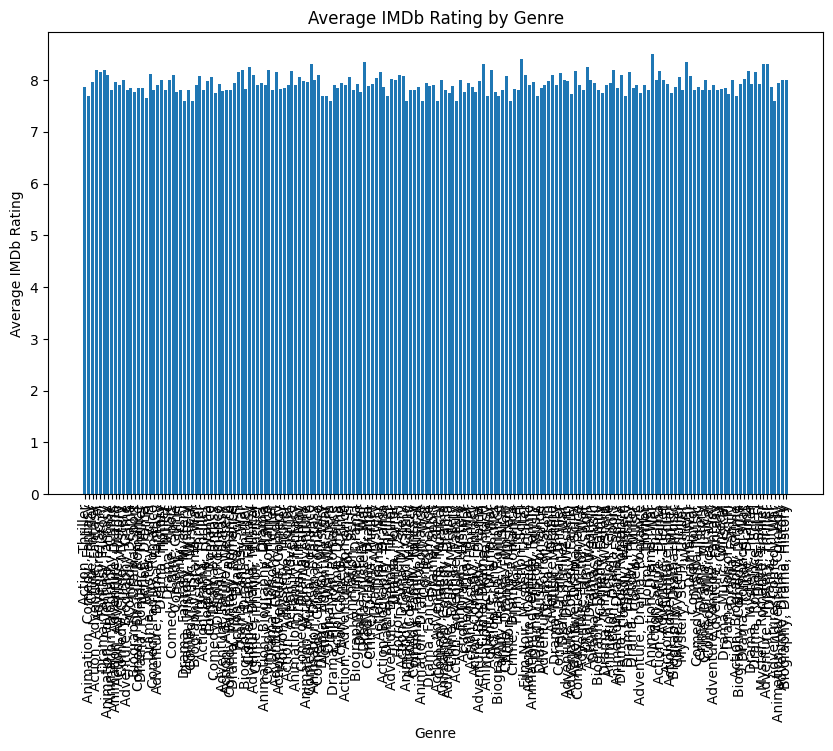

In [18]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas for plotting
pandas_df = df_genre_rating.toPandas()

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(pandas_df['Genre'], pandas_df['avg_imdb_rating'])
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xticks(rotation=90)
plt.show()
